We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style

In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

In [ ]:
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot')
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
# Create some data
rng = np.random.RandomState(0)
x = np.random.randn(500)
y = np.random.randn(500)
data = pd.DataFrame({'x':x,'y':y})
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

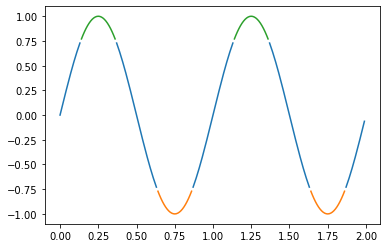

In [5]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

upper = 0.77
lower = -0.77
supper = np.ma.masked_where(s < upper, s) # 保留下所有s>upper的值，mask小于的值。
slower = np.ma.masked_where(s > lower, s)
smiddle = np.ma.masked_where(np.logical_or(s < lower, s > upper), s)
fig, ax = plt.subplots()
ax.plot(t, smiddle, t, slower, t, supper)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,6))
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.text(3, 8, 'boxed italics $E=mc^2$', style='italic',fontsize=15,
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)
ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.axis([0, 10, 0, 10])
plt.show()

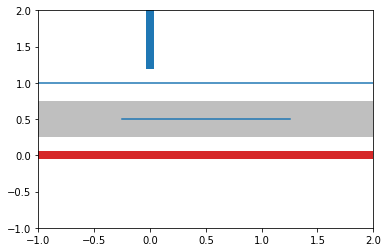

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.axhline(linewidth=8, color='#d62728')
plt.axhline(y=1)
plt.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')
plt.axhline(y=.5, xmin=0.25, xmax=0.75)
plt.axhspan(0.25, 0.75, facecolor='0.5', alpha=0.5)
plt.axis([-1, 2, -1, 2])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap(corr):
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    '''If passed, data will not be shown in cells where ``mask`` is True.
    Cells with missing values are automatically masked.'''
    plt.show()
heatmap(corr)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 为数据添加文本注释
def label(ax, text, y=0):
    ax.annotate(text, xy=(0.5, 0.00), xycoords='axes fraction', ha='center',
                style='italic',
                bbox=dict(boxstyle='round', facecolor='floralwhite',
                          ec='#8B7E66'))
def sin_data():
    x = np.linspace(0, 10, 100)
    y = np.sin(x)
    y2 = np.cos(x)
    return x, y, y2

def fill_between_example(ax):
    x, y1, y2 = sin_data()
    ax.fill_betweenx(x, -y1, where=y1 > 0, color='red', alpha=0.5)
    ax.fill_betweenx(x, -y1, where=y1 < 0, color='blue', alpha=0.5)
    ax.margins(0.15)
    label(ax, 'fill_between/x')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data():
    means = [0, -1, 2.5, 4.3, -3.6]
    sigmas = [1.2, 5, 3, 1.5, 2]
    nums = [150, 1000, 100, 200, 500]
    dists = [np.random.normal(*args) for args in zip(means, sigmas, nums)]
    return dists

# 箱型图
def boxplot(ax, dists, colors):
    result = ax.boxplot(dists, patch_artist=True, notch=True, vert=False)
    for box, color in zip(result['boxes'], colors):
        box.set(facecolor=color, alpha=0.5)
    for item in ['whiskers', 'caps', 'medians']:
        plt.setp(result[item], color='gray', linewidth=1.5)
    plt.setp(result['fliers'], markeredgecolor='gray', markeredgewidth=1.5)
    plt.setp(result['medians'], color='black')
    ax.margins(0.05)
    ax.set(yticks=[], ylim=[0, 6])

    label(ax, 'ax.boxplot(dists)')

#小提琴图
def violinplot(ax, dists, colors):
    result = ax.violinplot(dists, vert=False, showmedians=True)
    for body, color in zip(result['bodies'], colors):
        body.set(facecolor=color, alpha=0.5)
    for item in ['cbars', 'cmaxes', 'cmins', 'cmedians']:
        plt.setp(result[item], edgecolor='gray', linewidth=1.5)
    plt.setp(result['cmedians'], edgecolor='black')
    ax.margins(0.05)
    ax.set(ylim=[0, 6])
    label(ax, 'ax.violinplot(dists)')